
# Multi-objective Bayesian Optimization


TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
import os
import torch
from xopt import Xopt
from xopt.generators.bayesian.objectives import feasibility
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ignore all warnings
import warnings

warnings.filterwarnings("ignore")

SMOKE_TEST = os.environ.get("SMOKE_TEST")
NUM_STEPS = 2 if SMOKE_TEST else 50

YAML = """
generator:
    name: mobo
    reference_point: {y1: 1.5, y2: 1.5}

evaluator:
    function: xopt.resources.test_functions.tnk.evaluate_TNK

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    constants: {a: dummy_constant}

"""

In [2]:
X = Xopt.from_yaml(YAML)

# for testing purposes only
if SMOKE_TEST:
    X.generator.numerical_optimizer.n_restarts = 1
    X.generator.n_monte_carlo_samples = 1

X.random_evaluate(5)
for i in range(NUM_STEPS):
    print(i)
    X.step()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


KeyboardInterrupt: 

In [ ]:
X.generator.data

## plot results


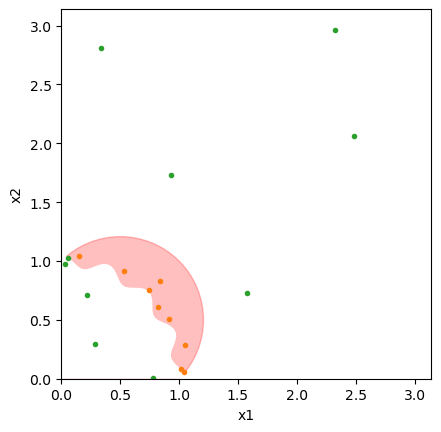

In [3]:
fig, ax = plt.subplots()

theta = np.linspace(0, np.pi / 2)
r = np.sqrt(1 + 0.1 * np.cos(16 * theta))
x_1 = r * np.sin(theta)
x_2_lower = r * np.cos(theta)
x_2_upper = (0.5 - (x_1 - 0.5) ** 2) ** 0.5 + 0.5

z = np.zeros_like(x_1)

# ax2.plot(x_1, x_2_lower,'r')
ax.fill_between(x_1, z, x_2_lower, fc="white")
circle = plt.Circle(
    (0.5, 0.5), 0.5**0.5, color="r", alpha=0.25, zorder=0, label="Valid Region"
)
ax.add_patch(circle)
history = pd.concat(
    [X.data, X.vocs.feasibility_data(X.data)], axis=1, ignore_index=False
)


ax.plot(*history[["x1", "x2"]][history["feasible"]].to_numpy().T, ".C1")
ax.plot(*history[["x1", "x2"]][~history["feasible"]].to_numpy().T, ".C2")

ax.set_xlim(0, 3.14)
ax.set_ylim(0, 3.14)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_aspect("equal")

### Plot path through input space

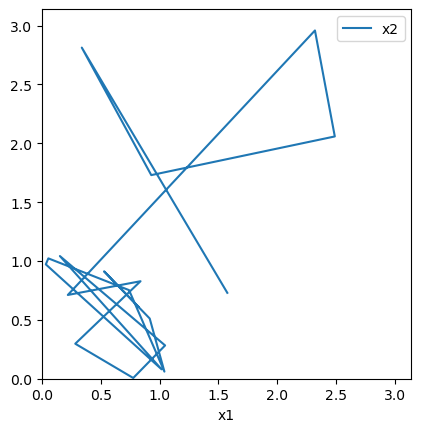

In [4]:
ax = history.plot("x1", "x2")
ax.set_ylim(0, 3.14)
ax.set_xlim(0, 3.14)
ax.set_aspect("equal")

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


(<Figure size 800x1650 with 19 Axes>,
 array([[<Axes: title={'center': 'Posterior Mean [y1]'}, ylabel='x2'>,
         <Axes: title={'center': 'Posterior SD [y1]'}>],
        [<Axes: title={'center': 'Posterior Mean [y2]'}, ylabel='x2'>,
         <Axes: title={'center': 'Posterior SD [y2]'}>],
        [<Axes: title={'center': 'Posterior Mean [c1]'}, ylabel='x2'>,
         <Axes: title={'center': 'Posterior SD [c1]'}>],
        [<Axes: title={'center': 'Posterior Mean [c2]'}, ylabel='x2'>,
         <Axes: title={'center': 'Posterior SD [c2]'}>],
        [<Axes: title={'center': 'Acq. Function'}, xlabel='x1', ylabel='x2'>,
         <Axes: xlabel='x1'>]], dtype=object))

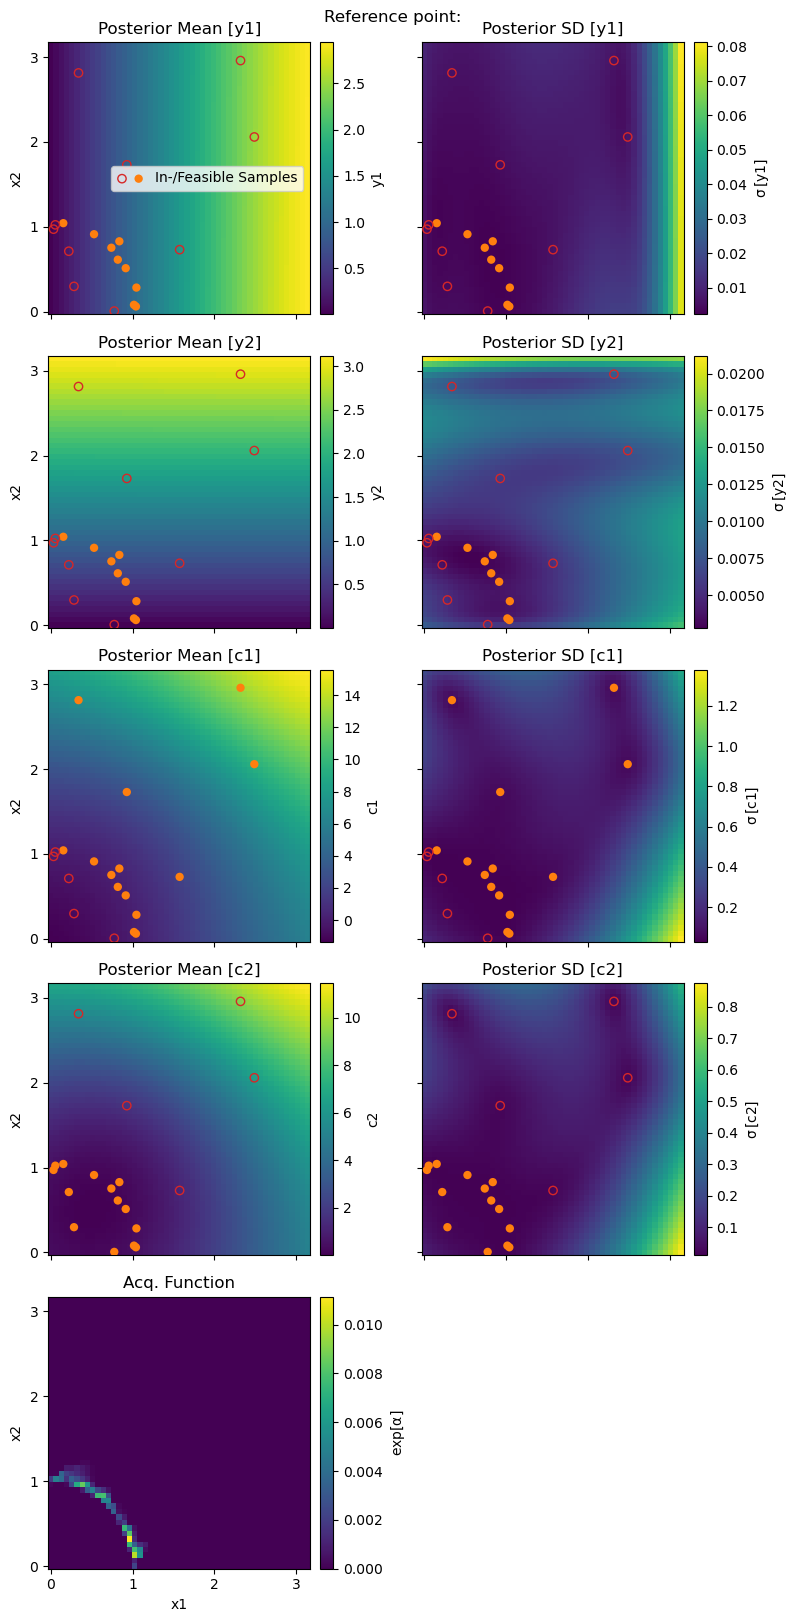

In [5]:
## visualize model
X.generator.visualize_model()